In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/LENOVO/laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
# remove GB of RAM col
df['Ram']=df['Ram'].str.replace('GB','')
# remove kg of Weight col
df['Weight']=df['Weight'].str.replace('kg','')

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
df['Ram']=df['Ram'].astype('float32')
df['Weight']=df['Weight'].astype('float32')

In [12]:
import seaborn as sns

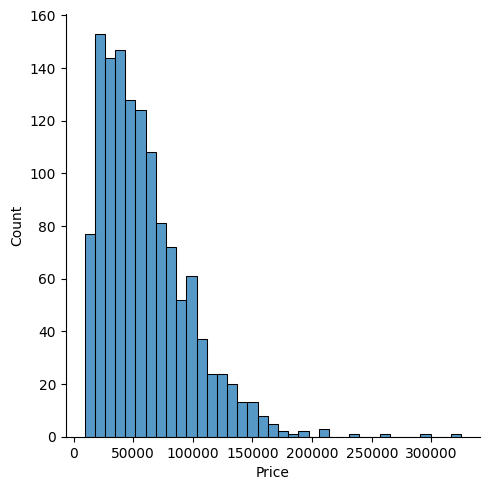

In [13]:
sns.displot(df['Price'])

<Axes: xlabel='Company'>

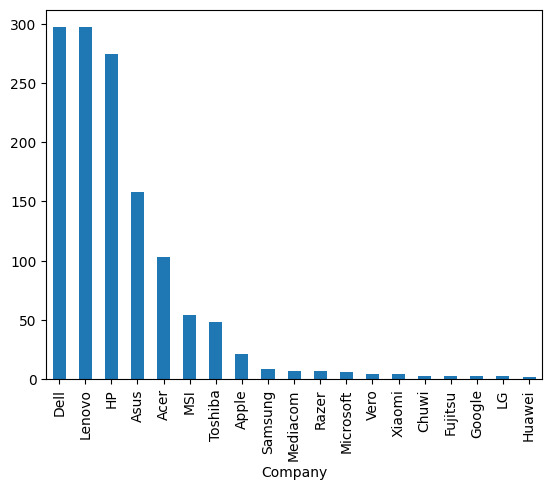

In [14]:
df['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='TypeName'>

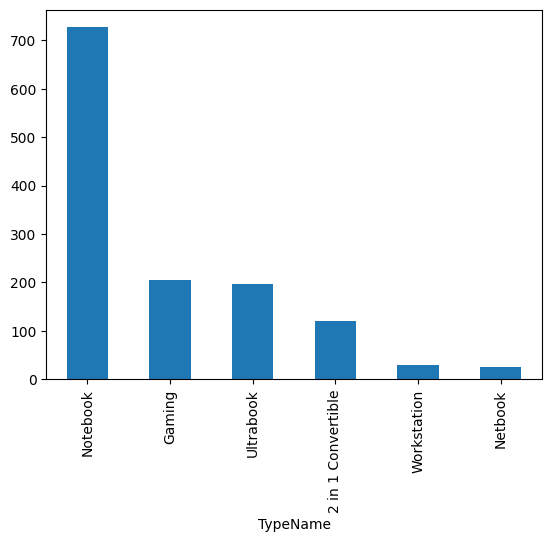

In [15]:
df['TypeName'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

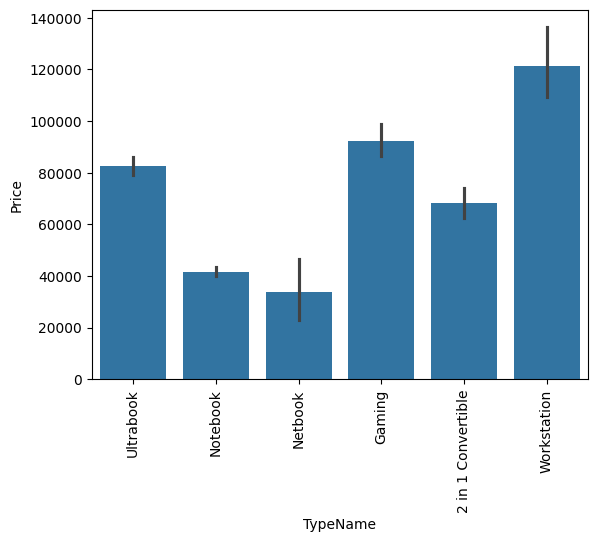

In [16]:
import matplotlib.pyplot as plt
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')

In [17]:
# screenresolution : 1.screen resolution  2.HD  3.IPS pannel   4.Touch screen

In [18]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0 )

<Axes: xlabel='Touchscreen', ylabel='Price'>

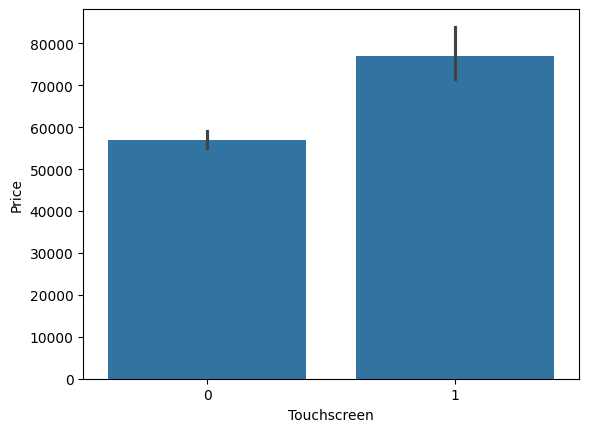

In [19]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [20]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

<Axes: xlabel='Ips', ylabel='Price'>

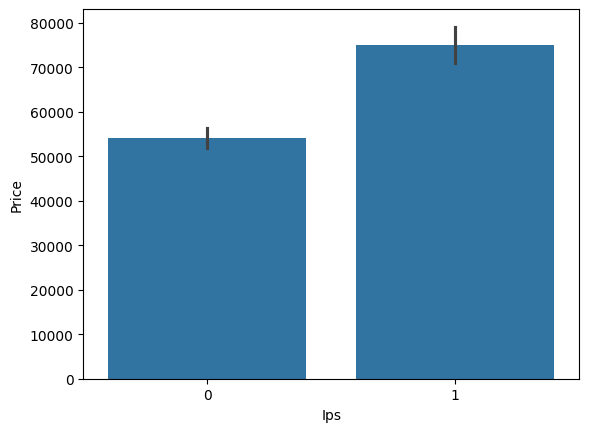

In [21]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [22]:
df['hd']=df['ScreenResolution'].apply(lambda x:1 if 'HD' in x else 0)

<Axes: xlabel='hd', ylabel='Price'>

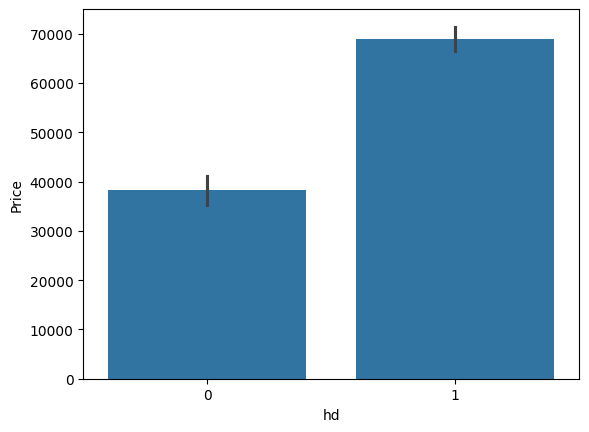

In [23]:
sns.barplot(x=df['hd'],y=df['Price'])

In [24]:
# separating x resolution and y resolution (200*100) => xres=200, yres=100
temp=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [25]:
df['yres']=temp[1]
df['xres']=temp[0]

In [26]:
df['xres'] = df['xres'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,hd,yres,xres
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,1600,2560


In [28]:
df['yres']=df['yres'].astype('int')
df['xres']=df['xres'].astype('int')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float32
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  hd                1303 non-null   int64  
 14  yres              1303 non-null   int64  
 15  xres              1303 non-null   int64  
dtypes: float32(2), float64(2), int64(5), objec

In [30]:
# correlation of col with price
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
hd             0.377209
yres           0.552809
xres           0.556529
Name: Price, dtype: float64

In [31]:
# as inches has a low correlation with price; so we'll combine inches, xres and yres to form a new strong correlated col
# which is ppi( price per inch) = sqrt(xres^2+yres^2)/inch
df['ppi']=((((df['xres']**2)+(df['yres']**2))**0.5)/df['Inches']).astype('float')

In [32]:
# drop those col
df.drop(columns=['Inches','xres','yres','ScreenResolution'],inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   float32
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  Ips          1303 non-null   int64  
 11  hd           1303 non-null   int64  
 12  ppi          1303 non-null   float64
dtypes: float32(2), float64(2), int64(3), object(6)
memory usage: 122.3+ KB


In [34]:
# Cpu : 1.i5, i7, i3   2.(Processor) Pentium, AMD
# extracting first 3 terms in the col cpu in the from of string 
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [35]:
# function which returns the cpu in the above categories
def fetch(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Intel Processor'
        else :
            return 'AMD Processor'

In [36]:
df['cpu brand']=df['Cpu Name'].apply(fetch)

In [37]:
df.drop(columns=['Cpu Name','Cpu'],inplace=True)

In [38]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,hd,ppi,cpu brand
0,Apple,Ultrabook,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Intel Processor')])

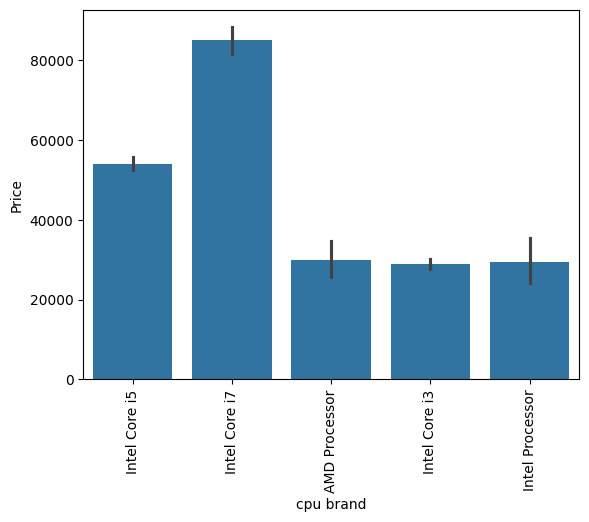

In [39]:
sns.barplot(x=df['cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Ram', ylabel='Price'>

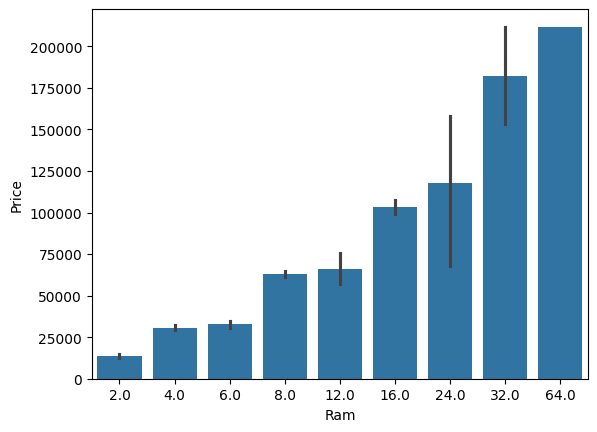

In [40]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [41]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [42]:
# Memory : 1.HDD  2.SDD  3. Flash Storage   4.Hybrid
# we'll split this col into 4 col and each row will have value for all 4
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].str.extract('(\d+)')
df["second"] = df["second"].fillna("0").str.extract('(\d+)')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12756\240674837.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [43]:
df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,hd,ppi,cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0,256,0,0


In [44]:
df.drop(columns=['Memory'],inplace=True)

In [45]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
hd               0.377209
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [46]:
# weak corr with Hybrid ans flash storage . although with hdd also but keepin hdd with ssd gives better results.
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [47]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [48]:
def brand(text):
    if text=='Intel' or text=='Nvidia' or text=='AMD':
        return text
    else:
        return 'Other brand'

In [49]:
# Gpu : 1.Intel  2.Nvidia  3.amd
df['gpu brand']=df['Gpu'].apply(lambda x: x.split()[0])

In [50]:
df['gpu brand'].value_counts()

gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [51]:
# drop arm
df=df[df['gpu brand'] !='ARM']

In [52]:
df['gpu brand'].value_counts()

gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [53]:
df.drop(columns=['Gpu'],inplace=True)

([0, 1, 2], [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

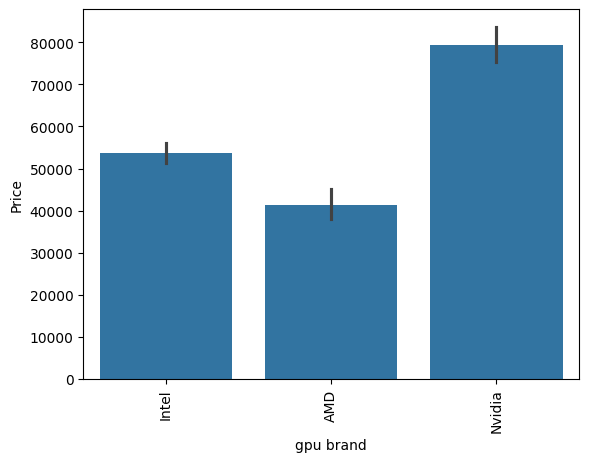

In [54]:
sns.barplot(x=df['gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')

In [55]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,hd,ppi,cpu brand,HDD,SSD,gpu brand
0,Apple,Ultrabook,8.0,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8.0,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,Intel


In [56]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [57]:
# os: 1.windows   2.macOs   3.others/no os/linux
def os(text):
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text=='macOS' or text=='Mac OS X':
        return 'macOs'
    else :
        return 'Others/no Os / Linux'

In [58]:
df['os brand']=df['OpSys'].apply(os)

In [59]:
df.head(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,hd,ppi,cpu brand,HDD,SSD,gpu brand,os brand
0,Apple,Ultrabook,8.0,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel,macOs
1,Apple,Ultrabook,8.0,macOS,1.34,47895.5232,0,0,0,127.677940,Intel Core i5,0,0,Intel,macOs
2,HP,Notebook,8.0,No OS,1.86,30636.0000,0,0,1,141.211998,Intel Core i5,0,256,Intel,Others/no Os / Linux
3,Apple,Ultrabook,16.0,macOS,1.83,135195.3360,0,1,0,220.534624,Intel Core i7,0,512,AMD,macOs
4,Apple,Ultrabook,8.0,macOS,1.37,96095.8080,0,1,0,226.983005,Intel Core i5,0,256,Intel,macOs


<Axes: xlabel='os brand', ylabel='Price'>

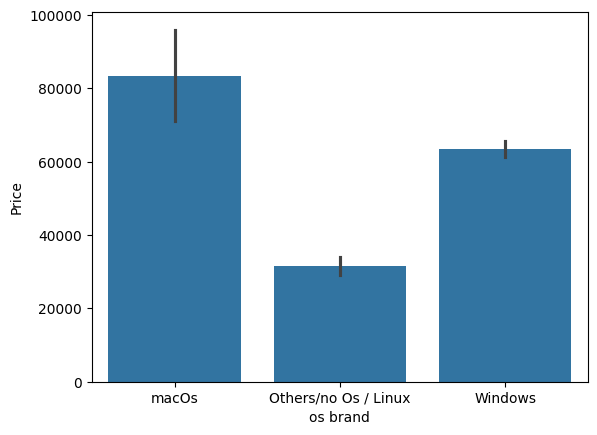

In [60]:
sns.barplot(x=df['os brand'],y=df['Price'])

<Axes: >

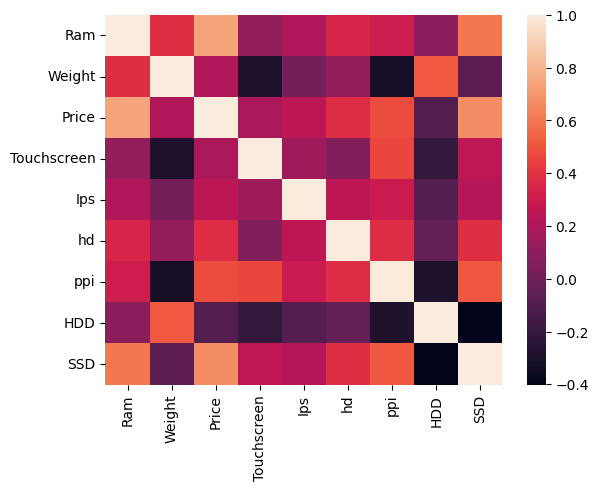

In [61]:
# relation of columns with other columns
numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12756\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

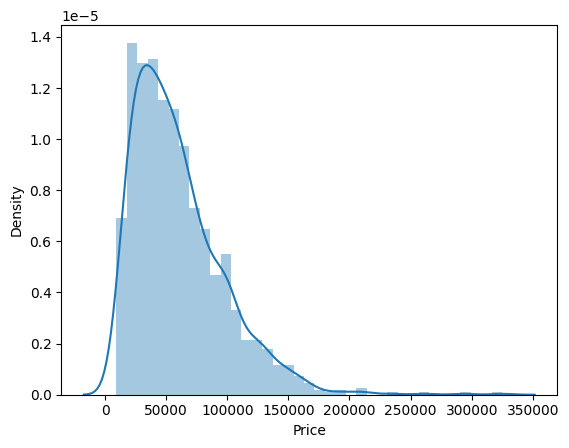

In [62]:
sns.distplot(df['Price'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12756\579895381.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

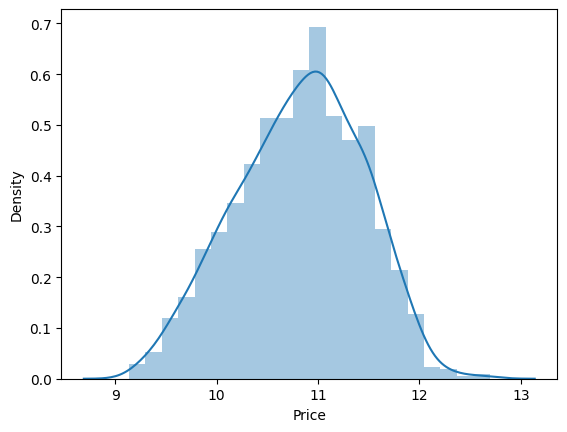

In [63]:
# as the price is skewed . therefore, apply log operation on it. We'll take the exponential of the prices for the final value
sns.distplot(np.log(df['Price']))

In [64]:
X= df.drop(columns=['Price'])
y=np.log(df['Price'])

In [65]:
X

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,hd,ppi,cpu brand,HDD,SSD,gpu brand,os brand
0,Apple,Ultrabook,8.0,macOS,1.37,0,1,0,226.983005,Intel Core i5,0,128,Intel,macOs
1,Apple,Ultrabook,8.0,macOS,1.34,0,0,0,127.677940,Intel Core i5,0,0,Intel,macOs
2,HP,Notebook,8.0,No OS,1.86,0,0,1,141.211998,Intel Core i5,0,256,Intel,Others/no Os / Linux
3,Apple,Ultrabook,16.0,macOS,1.83,0,1,0,220.534624,Intel Core i7,0,512,AMD,macOs
4,Apple,Ultrabook,8.0,macOS,1.37,0,1,0,226.983005,Intel Core i5,0,256,Intel,macOs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4.0,Windows 10,1.80,1,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16.0,Windows 10,1.30,1,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2.0,Windows 10,1.50,0,0,0,111.935204,Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6.0,Windows 10,2.19,0,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [66]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
# converting categorical cols
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [69]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

In [70]:
from xgboost import XGBRegressor

In [71]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.metrics import r2_score,mean_absolute_error

In [73]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,hd,ppi,cpu brand,HDD,SSD,gpu brand,os brand
0,Apple,Ultrabook,8.0,macOS,1.37,71378.6832,0,1,0,226.983005,Intel Core i5,0,128,Intel,macOs


In [74]:
df.drop(columns=['Ips','hd'],inplace=True)

## **Linear Regerssion**

In [75]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8104636790776434
MAE :  0.21237594149671787


## **Lasso Regressor**

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.0001)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8106184748853503
MAE :  0.2126431334257537


## **Rigde Regression**

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',StandardScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = Ridge()

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8108084227358805
MAE :  0.21285963181050335


## **KNN**        

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.817956982019288
MAE :  0.20380630198932914


## **Decision Tree**

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8253636846116473
MAE :  0.18537738515576171


## **SVR**

In [80]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = SVR()

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8735151903582458
MAE :  0.17199054469212008


## **Random Forest**

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8753151948692325
MAE :  0.16420967408998638


## **Gradient Boost**

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor()

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8510805957761345
MAE :  0.18958412429550522


## **Ada Boost**

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(learning_rate=1)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.758089757804862
MAE :  0.2515625474370312


## **XG Boost**

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = XGBRegressor(learning_rate=1)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8569607140915434
MAE :  0.1734677895777294


## **Extra Trees**

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

step2 = XGBRegressor(max_depth=5)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8847470568743993
MAE :  0.15459387282511064


## **Voting Regressor**

In [86]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=42,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=342,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8699644683704577
MAE :  0.17242145751023263


## **Stacking**

In [88]:
step1 = ColumnTransformer(transformers=[
    ('col',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,9,12,13]),
    ('num',MaxAbsScaler(),[2,4,5,6,7,8,10,11])
],remainder='passthrough')

estimators=[
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2_score : ' ,r2_score(y_test,y_pred))
print('MAE : ' ,mean_absolute_error(y_test,y_pred))

R2_score :  0.8647199173864462
MAE :  0.18080050738552153


## **Exporting Model**

In [89]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))